**Business Problem**
The main goal of this project is to PREDICT the price of the Amravati Flats using their features and collected data of Amravati flats

\# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("DATASET_AMRAVATI_FLATS.csv")
df1.shape

(343, 8)

In [3]:
df1.head()


,Location,Total_sqft,BHK,Bath,Availability,Balcony,Society,Price
0,Rahatgoan,2208.8,3,3,Ready To Move,3.0,NaN,46.2
1,Shegoan Rahatgoan Road,877.5,2,2,Ready To Move,NaN,NaN,39.0
2,Chatrapati Sahu Nagar,1680.0,3,3,Ready To Move,4.0,NaN,47.2
3,Sai Nagar,561.0,2,2,Ready To Move,NaN,NaN,39.6
4,Sai Nagar,2000.0,2,2,Ready To Move,4.0,NaN,45.0


In [4]:
df1.tail()


,Location,Total_sqft,BHK,Bath,Availability,Balcony,Society,Price
338,Ambika Nagar,2834.0,2,2,NaN,2.0,NaN,65.0
339,Rajapeth,950.0,2,3,Ready To Move,NaN,NaN,45.0
340,Sai Nagar,770.0,2,2,Ready To Move,3.0,NaN,36.3
341,Balaji Nagar,1045.0,2,2,Ready To Move,2.0,NaN,49.5
342,Old Bye Pass,3568.4,1,1,NaN,1.0,NaN,60.5


Data Analysis

In [5]:
# get the information of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      343 non-null    object 
 1   Total_sqft    343 non-null    float64
 2   BHK           343 non-null    int64  
 3   Bath          343 non-null    int64  
 4   Availability  301 non-null    object 
 5   Balcony       247 non-null    float64
 6   Society       28 non-null     object 
 7   Price         343 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 21.6+ KB


In [6]:
# We have 5 neumerical features - Total_sqft , BHK , Bath, Balcony and Price
# 3 categorical features - Location , Availability and  Society
# Target Feature =======>>>>>> price >>>>>>
# Price in lakh

In [7]:
df1.describe()

,Total_sqft,BHK,Bath,Balcony,Price
count,343.000000,343.000000,343.000000,247.000000,343.000000
mean,1361.506701,2.154519,1.956268,2.303644,47.909903
std,652.543173,0.594346,0.541667,0.928822,13.613100
min,361.670000,1.000000,1.000000,1.000000,19.000000
25%,950.000000,2.000000,2.000000,2.000000,38.000000
50%,1173.700000,2.000000,2.000000,2.000000,46.200000
75%,1600.000000,2.000000,2.000000,3.000000,56.483077
max,4282.080000,5.000000,4.000000,4.000000,79.200000


**Preare Data for Machine Learning Model**

**Data cleaning**

<Axes: >

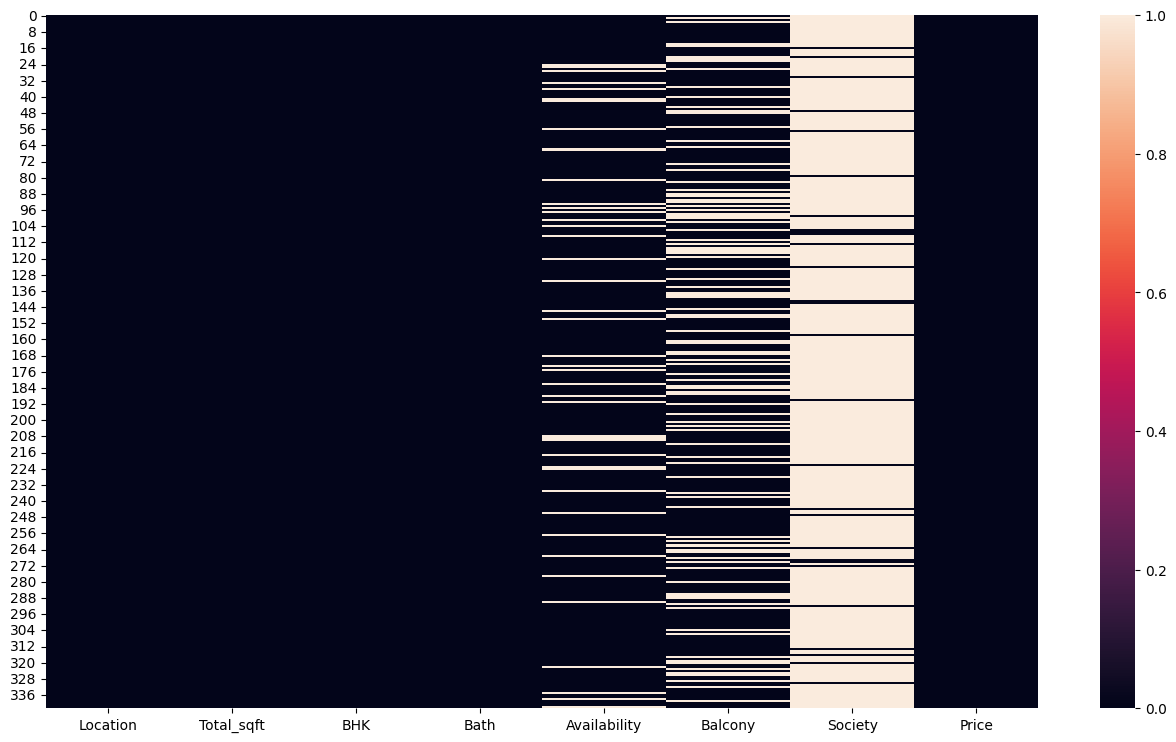

In [8]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(df1.isnull())

In [9]:
df1.isnull().sum() 
# find the how much missing data available

Location          0
Total_sqft        0
BHK               0
Bath              0
Availability     42
Balcony          96
Society         315
Price             0
dtype: int64

In [10]:
df1.isnull().mean()*100 
# ho much missing data available in % of missing value

Location         0.000000
Total_sqft       0.000000
BHK              0.000000
Bath             0.000000
Availability    12.244898
Balcony         27.988338
Society         91.836735
Price            0.000000
dtype: float64

In [11]:
# Drop ----------> society feature
# because 91.83 missing value
df2 = df1.drop('Society', axis='columns')
df2.shape

(343, 7)

In [12]:
df2['Availability'].unique()

array(['Ready To Move', nan, 'Under Construction'], dtype=object)

In [13]:
df2['Availability'].value_counts()


Ready To Move         286
Under Construction     15
Name: Availability, dtype: int64

In [14]:
# DROP UNNECESSARY FEATURES
df3 = df2.drop(['Balcony','Availability'],axis='columns')
df3.shape

(343, 5)

In [15]:
df3.isnull().sum()

Location      0
Total_sqft    0
BHK           0
Bath          0
Price         0
dtype: int64

In [16]:
df4=df3.copy()

## Feature Engineering

In [17]:
# to show all the columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [18]:
df4.head()

,Location,Total_sqft,BHK,Bath,Price
0,Rahatgoan,2208.8,3,3,46.2
1,Shegoan Rahatgoan Road,877.5,2,2,39.0
2,Chatrapati Sahu Nagar,1680.0,3,3,47.2
3,Sai Nagar,561.0,2,2,39.6
4,Sai Nagar,2000.0,2,2,45.0


In [19]:
df4['BHK'].value_counts()

2    236
3     73
1     30
4      2
5      2
Name: BHK, dtype: int64

In [20]:
df5 = df4[df4.BHK<4]
df5.shape

(339, 5)

In [21]:
df5.head()

,Location,Total_sqft,BHK,Bath,Price
0,Rahatgoan,2208.8,3,3,46.2
1,Shegoan Rahatgoan Road,877.5,2,2,39.0
2,Chatrapati Sahu Nagar,1680.0,3,3,47.2
3,Sai Nagar,561.0,2,2,39.6
4,Sai Nagar,2000.0,2,2,45.0


In [22]:
df6 = df5.copy()
df6['price_per_sqft'] = df6['Price']*100000/df6['Total_sqft']
df6.head()

,Location,Total_sqft,BHK,Bath,Price,price_per_sqft
0,Rahatgoan,2208.8,3,3,46.2,2091.633466
1,Shegoan Rahatgoan Road,877.5,2,2,39.0,4444.444444
2,Chatrapati Sahu Nagar,1680.0,3,3,47.2,2809.523810
3,Sai Nagar,561.0,2,2,39.6,7058.823529
4,Sai Nagar,2000.0,2,2,45.0,2250.000000


In [23]:
df6_stats = df6['price_per_sqft'].describe()
df6_stats

count      339.000000
mean      4004.195273
std       1960.330095
min       1695.437731
25%       2761.904762
50%       3703.703704
75%       4736.842105
max      18801.670031
Name: price_per_sqft, dtype: float64

In [24]:
df6.to_csv("AMT_FLATS_WITH_PPS.csv",index=False)

EXAMINE LOCATIONS WHICH IS A CATEGORICAL VARIABLE.

In [25]:
df7=df6.copy()

In [26]:
df7.Location = df7.Location.apply(lambda x: x.strip())
location_stats = df7['Location'].value_counts(ascending=False)
location_stats

Sai Nagar                      40
Arjun Nagar                    26
Shegoan Rahatgoan Road         18
Dastur Nagar                   18
Jawahar Nagar                  14
MIDC Road                      12
Old Bye Pass                   12
Walgaon road                   10
Camp Road                      10
Saturna                         9
Dr.Punjabrao Deshmuk Colony     9
Rathi Nagar                     9
Gadge Nagar                     9
Gopal Nagar                     8
Jai Bhole                       7
Ambika Nagar                    7
Navsari                         7
Pundlik Baba Nagar              7
Parvati Nagar                   7
Rajapeth                        7
Chatrapati Sahu Nagar           6
Sarswati Nagar                  6
Ring Road                       5
Shradha Vihar                   5
Deshmukh Lawn                   5
Amba Peth                       4
Kiran Nagar                     4
Ekvira Nagar                    4
Ravi Nagar                      4
Hingaspure Nag

In [27]:
location_stats.values.sum()

339

In [28]:
len(location_stats[location_stats>1])

43

In [29]:
len(location_stats)

45

In [30]:
len(location_stats[location_stats<=1])


2

In [31]:
### DIMENSIONALITY REDUCTIONS
location_stats_less_than_1 = location_stats[location_stats<=1]
location_stats_less_than_1

Eknathpuram    1
Ring road      1
Name: Location, dtype: int64

In [32]:
len(df7.Location.unique())


45

In [33]:
df7.Location = df7.Location.apply(lambda x: 'other' if x in location_stats_less_than_1 else x)
len(df7.Location.unique())

44

In [34]:
df7.head()

,Location,Total_sqft,BHK,Bath,Price,price_per_sqft
0,Rahatgoan,2208.8,3,3,46.2,2091.633466
1,Shegoan Rahatgoan Road,877.5,2,2,39.0,4444.444444
2,Chatrapati Sahu Nagar,1680.0,3,3,47.2,2809.523810
3,Sai Nagar,561.0,2,2,39.6,7058.823529
4,Sai Nagar,2000.0,2,2,45.0,2250.000000


**Finding Outlier and Removing**

In [35]:
df7.price_per_sqft.describe()

count      339.000000
mean      4004.195273
std       1960.330095
min       1695.437731
25%       2761.904762
50%       3703.703704
75%       4736.842105
max      18801.670031
Name: price_per_sqft, dtype: float64

**OUTLIER REMOVAL USING STANDARD DEVIATION AND MEAN**

HERE WE FIND THAT MIN PRICE PER SQFT IS 1695.43 RS/SQFT WHEREAS MAX IS 18801.67, THIS SHOWS A WIDE VARIATION IN PROPERTY PRICES. WE SHOULD REMOVE OUTLIERS PER LOCATION USING MEAN AND ONE STANDARD DEVIATION

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(197, 6)

### OUTLIER REMOVAL USING BUSINESS LOGIC
CONVERSATION WITH BUSINESS MANAGER (WHO HAS EXPERTISE IN REAL ESTATE), HE WILL TELL THAT NORMALLY SQUARE FT PER BEDROOM IS 300 (I.E. 2 BHK APARTMENT IS MINIMUM 600 SQFT. IF YOU HAVE FOR EXAMPLE 400 SQFT APARTMENT WITH 2 BHK THAN THAT SEEMS SUSPICIOUS AND CAN BE REMOVED AS AN OUTLIER. WE WILL REMOVE SUCH OUTLIERS BY KEEPING OUR MINIMUM PER BHK TO BE 300 SQFT


In [37]:
df8[df8.Total_sqft/df8.BHK<300].head()

,Location,Total_sqft,BHK,Bath,Price,price_per_sqft
56,Gadge Nagar,525.000,2,1,29.00,5523.809524
57,Gadge Nagar,577.500,2,1,31.90,5523.809524
80,Kathora Road,361.670,3,3,68.00,18801.670031
81,Kathora Road,397.837,3,3,66.55,16727.956424


**CHECK THE ABOVE DATA POINTS. WE HAVE 3 BHK APARTMENTS WITH 361.67 SQFT.THESE ARE CLEAR DATA ERRORS THAT CAN BE REMOVED SAFELY**


In [38]:
df8.shape

(197, 6)

In [39]:
df9 = df8[~(df8.Total_sqft/df8.BHK<300)]
df9.shape

(193, 6)

In [40]:
df9.head(2)

,Location,Total_sqft,BHK,Bath,Price,price_per_sqft
0,Ambika Nagar,2000.0,3,2,70.0,3500.000000
1,Ambika Nagar,1306.8,3,2,48.4,3703.703704


**LET'S CHECK IF FOR A GIVEN LOCATION HOW DOES THE 2 BHK AND 3 BHK PROPERTY PRICES LOOK LIKE**

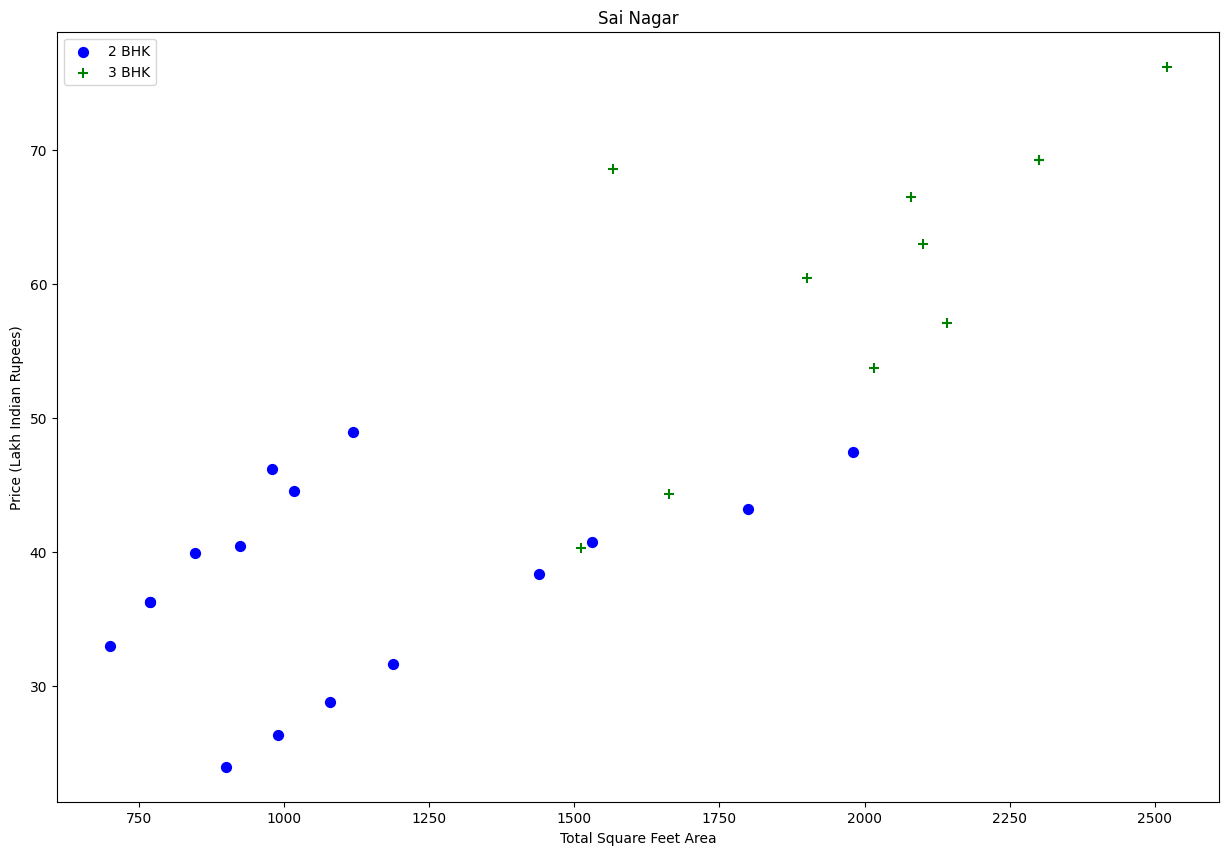

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.Location==location) & (df.BHK==2)]
    bhk3 = df[(df.Location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Total_sqft,bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Total_sqft,bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df9,"Sai Nagar")

**NOW WE CAN REMOVE THOSE 3 BHK WHOSE PRICE_PER_SQFT IS LESS THAN THE MEAN PRICE_PER_SQFT OF 2 BHK APARTMENT**

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>3:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df10 = remove_bhk_outliers(df9)
df10.shape

(176, 6)

**PLOT SAME SCATTER CHART AGAIN TO VISUALIZE PRICE_PER_SQFT FOR 2 BHK AND 3 BHK PROPERTIES**

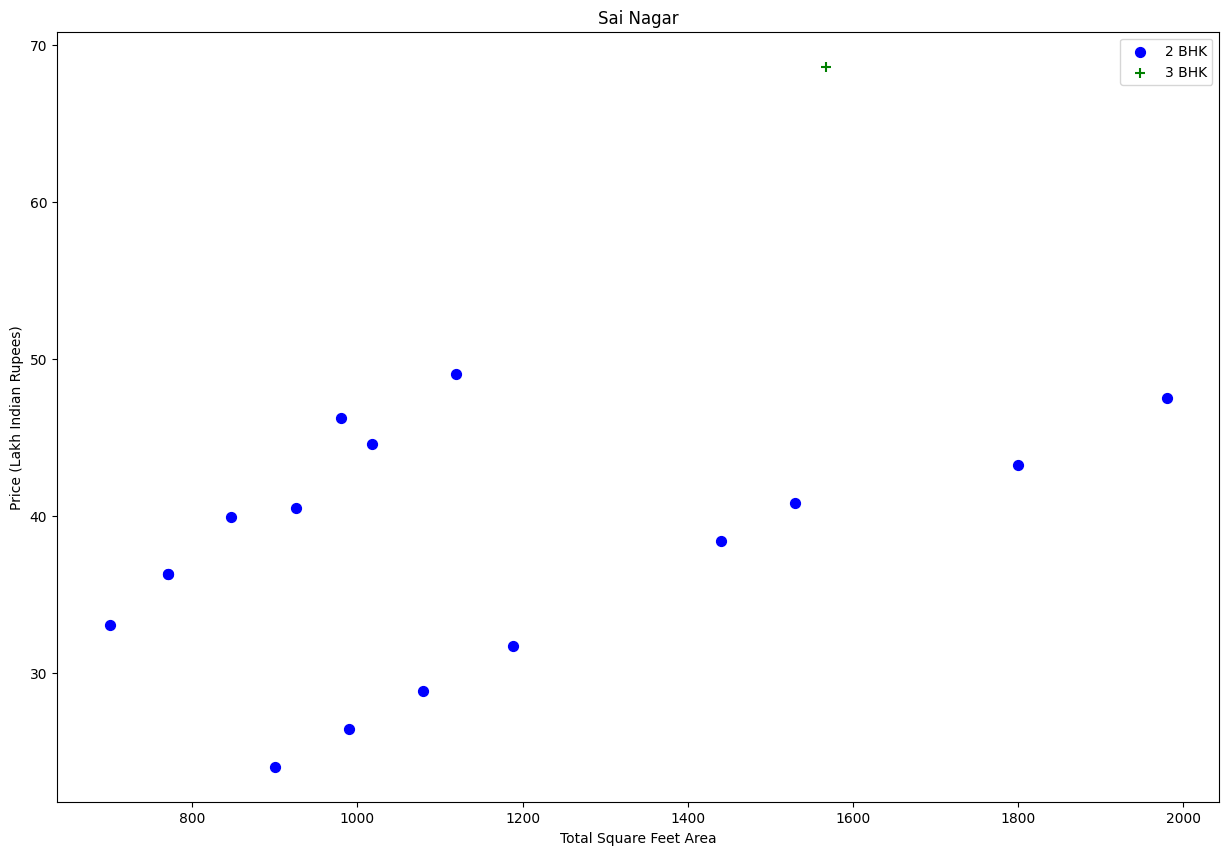

In [43]:
plot_scatter_chart(df10,"Sai Nagar")

In [44]:
df10.Bath.unique()

array([2, 3, 1])

In [45]:
df10.shape


(176, 6)

In [46]:
df10.head()

,Location,Total_sqft,BHK,Bath,Price,price_per_sqft
0,Ambika Nagar,2000.0,3,2,70.0,3500.000000
1,Ambika Nagar,1306.8,3,2,48.4,3703.703704
2,Ambika Nagar,1080.0,3,2,40.0,3703.703704
3,Ambika Nagar,1188.0,3,2,44.0,3703.703704
4,Ambika Nagar,2200.0,3,2,77.0,3500.000000


In [47]:
df11 = df10.drop('price_per_sqft',axis='columns')
df11.head()

,Location,Total_sqft,BHK,Bath,Price
0,Ambika Nagar,2000.0,3,2,70.0
1,Ambika Nagar,1306.8,3,2,48.4
2,Ambika Nagar,1080.0,3,2,40.0
3,Ambika Nagar,1188.0,3,2,44.0
4,Ambika Nagar,2200.0,3,2,77.0


In [48]:
df12=df11.copy()

**USE ONE HOT ENCODING FOR LOCATION:**

In [49]:
dummies = pd.get_dummies(df12.Location)
dummies.head()

,Ambika Nagar,Arjun Nagar,Camp Road,Chatrapati Sahu Nagar,Dastur Nagar,Dr.Punjabrao Deshmuk Colony,Ekvira Nagar,Gadge Nagar,Gopal Nagar,Jai Bhole,Jawahar Nagar,Kaloti Nagar,MIDC Road,Morshi Road,Moti Nagar,Navsari,Old Bye Pass,Parvati Nagar,Pundlik Baba Nagar,Rahatgaon Ring Road,Rajapeth,Rathi Nagar,Ring Road,Rukhmini Nagar,Sai Nagar,Sarswati Nagar,Saturna,Shegoan Rahatgoan Road,Walgaon road,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df13 = pd.concat([df12,dummies.drop('other',axis='columns')],axis='columns')
df13.head()

,Location,Total_sqft,BHK,Bath,Price,Ambika Nagar,Arjun Nagar,Camp Road,Chatrapati Sahu Nagar,Dastur Nagar,Dr.Punjabrao Deshmuk Colony,Ekvira Nagar,Gadge Nagar,Gopal Nagar,Jai Bhole,Jawahar Nagar,Kaloti Nagar,MIDC Road,Morshi Road,Moti Nagar,Navsari,Old Bye Pass,Parvati Nagar,Pundlik Baba Nagar,Rahatgaon Ring Road,Rajapeth,Rathi Nagar,Ring Road,Rukhmini Nagar,Sai Nagar,Sarswati Nagar,Saturna,Shegoan Rahatgoan Road,Walgaon road
0,Ambika Nagar,2000.0,3,2,70.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ambika Nagar,1306.8,3,2,48.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ambika Nagar,1080.0,3,2,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ambika Nagar,1188.0,3,2,44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ambika Nagar,2200.0,3,2,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df14 = df13.drop('Location',axis='columns')
df14.head(10)

,Total_sqft,BHK,Bath,Price,Ambika Nagar,Arjun Nagar,Camp Road,Chatrapati Sahu Nagar,Dastur Nagar,Dr.Punjabrao Deshmuk Colony,Ekvira Nagar,Gadge Nagar,Gopal Nagar,Jai Bhole,Jawahar Nagar,Kaloti Nagar,MIDC Road,Morshi Road,Moti Nagar,Navsari,Old Bye Pass,Parvati Nagar,Pundlik Baba Nagar,Rahatgaon Ring Road,Rajapeth,Rathi Nagar,Ring Road,Rukhmini Nagar,Sai Nagar,Sarswati Nagar,Saturna,Shegoan Rahatgoan Road,Walgaon road
0,2000.0,3,2,70.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1306.8,3,2,48.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1080.0,3,2,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1188.0,3,2,44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2200.0,3,2,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,980.0,2,2,37.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1372.0,2,2,51.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1067.0,2,2,37.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,800.0,2,2,28.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1078.0,2,2,40.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**BUILDING A MODEL**

In [52]:
df14.shape


(176, 33)

In [53]:
X = df14.drop(['Price'],axis='columns')
X.head(3)

,Total_sqft,BHK,Bath,Ambika Nagar,Arjun Nagar,Camp Road,Chatrapati Sahu Nagar,Dastur Nagar,Dr.Punjabrao Deshmuk Colony,Ekvira Nagar,Gadge Nagar,Gopal Nagar,Jai Bhole,Jawahar Nagar,Kaloti Nagar,MIDC Road,Morshi Road,Moti Nagar,Navsari,Old Bye Pass,Parvati Nagar,Pundlik Baba Nagar,Rahatgaon Ring Road,Rajapeth,Rathi Nagar,Ring Road,Rukhmini Nagar,Sai Nagar,Sarswati Nagar,Saturna,Shegoan Rahatgoan Road,Walgaon road
0,2000.0,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1306.8,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1080.0,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
X.shape

(176, 32)

In [55]:
y = df14.Price
y.head(3)

0    70.0
1    48.4
2    40.0
Name: Price, dtype: float64

In [56]:
len(y)

176

**TRAIN AND TEST DATA**

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8891502038434431

In [59]:
"""## XGBoost"""
 
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg.score(X_test,y_test)


0.8043697180299954

In [60]:
"""## Random Forest Regressor"""
 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.6927294313558761

**USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR LINEAR REGRESSION MODEL**

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89235115, 0.91481035, 0.83954899, 0.85874277, 0.90974863])

**BASED ON THE ABOVE RESULTS WE CAN SAY THAT LINEAR REGRESSION GIVES THE BEST SCORE. HENCE WE WILL USE THAT.**


**TEST THE MODEL FOR FEW PROPERTIES**

In [62]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [63]:
predict_price('Ambika Nagar',2000,3,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.92569312653734

In [64]:
predict_price('Ambika Nagar',1306,3,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.29924135155881

In [65]:
predict_price('Arjun Nagar',980,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.39970996768722

**IMPORT PICKLE LIBRARIES AN SAVE MODEL**

In [66]:
import pickle
with open('Amravati_Flats_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

**IMPORT JSON LIBRARIES FOR SAVING LOCATIONS IN COLUMNS**

In [67]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))